In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils
system = 'jabref'

In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)

files = config['file locations'][system]
preprocess_settings = config['preprocess settings list']

In [3]:
# set file_locations which will be relative to computer in use
from pathlib import Path
raw_data_csv = str(Path.cwd().parent / files['raw data'])
system_folder = str(Path.cwd().parent / files['system folder'])
tmp_csv = str(Path.cwd().parent / files['tmp data'])
table_file = str(Path.cwd().parent / files['preprocess comparisons'])

In [4]:
Gather.gather_architectural_concerns_data(system_folder, raw_data_csv)

Text(0.5, 1.0, 'File distribution of the software architectural concerns for jabref')

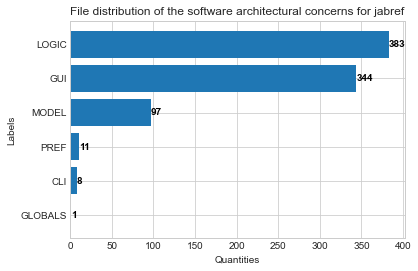

In [5]:
dataset_df = pd.read_csv(raw_data_csv)
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('File distribution of the software architectural concerns for ' + system)

# Bag-of-words approach
    -test-size: 85%
    -10 folds (k-fold)
    -feature representation: Bag-of-words


In [6]:
df_columns = [
    'classifier',
    'setting_id',
    'settings', 
    'accuracy', 
    'w_avg_precision', 
    'w_avg_recall', 
    'train_size', 
    'test_size', 
    'report_table' 
]
main_table = pd.DataFrame(columns=df_columns)
test_size=0.85
fold_quantity = 10

for setting_id, setting in preprocess_settings.items():
    Prep.preprocess_settings(setting, raw_data_csv, tmp_csv)
    tmp_df = pd.read_csv(tmp_csv)

    # Remove concerns where number of testfiles are <5
    df_sliced = Utils.remove_concerns_under_quantity_threshold(tmp_df)

    feature_representation = CountVectorizer()
    confusion_list = []

    # Train and gather evaluation metrics
    evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity, 10)
    classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
    classifier_svm , metrics_svm = evaluate.evaluate_SVM()
    classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()
      
    row = Utils.make_dataframe_row(metrics_max_ent, setting, setting_id)
    main_table = main_table.append(row, ignore_index=True)

    row = Utils.make_dataframe_row(metrics_svm, setting, setting_id)
    main_table = main_table.append(row, ignore_index=True)
    
    row = Utils.make_dataframe_row(metrics_naive, setting, setting_id)
    main_table = main_table.append(row, ignore_index=True)

main_table.to_csv(table_file, index=False)

In [7]:
main_table.sort_values(by='accuracy',ascending=[False])

,classifier,setting_id,settings,accuracy,w_avg_precision,w_avg_recall,train_size,test_size,report_table
1,SVM,s0,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]]",0.969014,0.964050,0.969014,125,710,GUI LOGIC MODEL ...
0,MaxEnt,s0,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]]",0.956338,0.958352,0.956338,125,710,GUI LOGIC MODEL ...
2,Naive-Bayes,s0,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]]",0.916901,0.918047,0.916901,125,710,GUI LOGIC MODEL ...
3,MaxEnt,s1,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]...",0.915493,0.923783,0.915493,125,710,GUI LOGIC MODEL ...
4,SVM,s1,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]...",0.914085,0.923172,0.914085,125,710,GUI LOGIC MODEL ...
9,MaxEnt,s3,"[[pac, tow, jk], [lib, tow, scw, jk, lc, stem]...",0.892958,0.889615,0.892958,125,710,GUI LOGIC MODEL ...
10,SVM,s3,"[[pac, tow, jk], [lib, tow, scw, jk, lc, stem]...",0.880282,0.902274,0.880282,125,710,GUI LOGIC MODEL ...
12,MaxEnt,s4,"[[lib, tow, scw, jk, lc, stem], [pac, tow, jk]...",0.873239,0.884323,0.873239,125,710,GUI LOGIC MODEL ...
14,Naive-Bayes,s4,"[[lib, tow, scw, jk, lc, stem], [pac, tow, jk]...",0.854930,0.844147,0.854930,125,710,GUI LOGIC MODEL ...
17,Naive-Bayes,s5,"[[lib, tow, jk, scw, lc, sw, stem], [pac, tow,...",0.853521,0.847642,0.853521,125,710,GUI LOGIC MODEL ...


# Term-frequency inverse-document

In [10]:
df_columns = [
    'classifier',
    'setting_id',
    'settings', 
    'accuracy', 
    'w_avg_precision', 
    'w_avg_recall', 
    'train_size', 
    'test_size', 
    'report_table' 
]
main_table = pd.DataFrame(columns=df_columns)
test_size=0.85
fold_quantity = 10

for setting_id, setting in preprocess_settings.items():
    Prep.preprocess_settings(setting, raw_data_csv, tmp_csv)
    tmp_df = pd.read_csv(tmp_csv)

    # Remove concerns where number of testfiles are <5
    df_sliced = Utils.remove_concerns_under_quantity_threshold(tmp_df)

    feature_representation = TfidfVectorizer(use_idf = True)
    confusion_list = []

    # Train and gather evaluation metrics
    evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity, 10)
    classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
    classifier_svm , metrics_svm = evaluate.evaluate_SVM()
    classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()
      
    row = Utils.make_dataframe_row(metrics_max_ent, setting, setting_id)
    main_table = main_table.append(row, ignore_index=True)

    row = Utils.make_dataframe_row(metrics_svm, setting, setting_id)
    main_table = main_table.append(row, ignore_index=True)
    
    row = Utils.make_dataframe_row(metrics_naive, setting, setting_id)
    main_table = main_table.append(row, ignore_index=True)

main_table.to_csv(table_file, index=False)

In [11]:
main_table.sort_values(by='accuracy',ascending=[False])

,classifier,setting_id,settings,accuracy,w_avg_precision,w_avg_recall,train_size,test_size,report_table
1,SVM,s0,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]]",0.926761,0.933927,0.926761,125,710,GUI LOGIC MODEL ...
0,MaxEnt,s0,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]]",0.923944,0.931188,0.923944,125,710,GUI LOGIC MODEL ...
2,Naive-Bayes,s0,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]]",0.907042,0.905988,0.907042,125,710,GUI LOGIC MODEL ...
3,MaxEnt,s1,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]...",0.863380,0.877687,0.863380,125,710,GUI LOGIC MODEL ...
11,Naive-Bayes,s3,"[[pac, tow, jk], [lib, tow, scw, jk, lc, stem]...",0.860563,0.844604,0.860563,125,710,GUI LOGIC MODEL P...
14,Naive-Bayes,s4,"[[lib, tow, scw, jk, lc, stem], [pac, tow, jk]...",0.859155,0.852519,0.859155,125,710,GUI LOGIC MODEL ...
5,Naive-Bayes,s1,"[[lib, tow, jk, scw, lc, stem], [pac, tow, jk]...",0.857746,0.842999,0.857746,125,710,GUI LOGIC MODEL ...
9,MaxEnt,s3,"[[pac, tow, jk], [lib, tow, scw, jk, lc, stem]...",0.853521,0.856968,0.853521,125,710,GUI LOGIC MODEL ...
20,Naive-Bayes,s6,"[[lib, tow, jk, scw, lc, sw, stem], [pac, tow,...",0.847887,0.833413,0.847887,125,710,GUI LOGIC MODEL ...
17,Naive-Bayes,s5,"[[lib, tow, jk, scw, lc, sw, stem], [pac, tow,...",0.846479,0.830340,0.846479,125,710,GUI LOGIC MODEL ...
